# KERNEL SVM

Nhóm: 
*   19520954 - Lê Thị Thanh Thanh
*   19522492 - Huỳnh Thiện Tùng
*   19522542 - Nguyễn Thành Vương





# Một số thư viện cần dùng

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
# show confuse matrix
def showCM(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()
  plt.figure(figsize=(8, 5))
  sns.heatmap(cf_matrix, annot=True, cmap='Blues',ax = ax, fmt=".1f")
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

# Tập dữ liệu make_moon

## Khởi tạo, xử lý và trực quan hóa dữ liệu

### Khởi tạo bộ dữ liệu

In [ ]:
X, y = make_moons(n_samples=10000,noise=0.3, random_state=0)

In [ ]:
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


### Phân bố của dữ liệu

In [ ]:
class_0, class_1, label_0, label_1 = [],[],[],[]

for i in range(len(y)):
  if y[i] == 0:
    class_0.append(X[i])
    label_0.append(y[i])
  else:
    class_1.append(X[i])
    label_1.append(y[i])

class_0 = np.array(class_0)
class_1 = np.array(class_1)
label_0 = np.array(label_0)
label_1 = np.array(label_1)

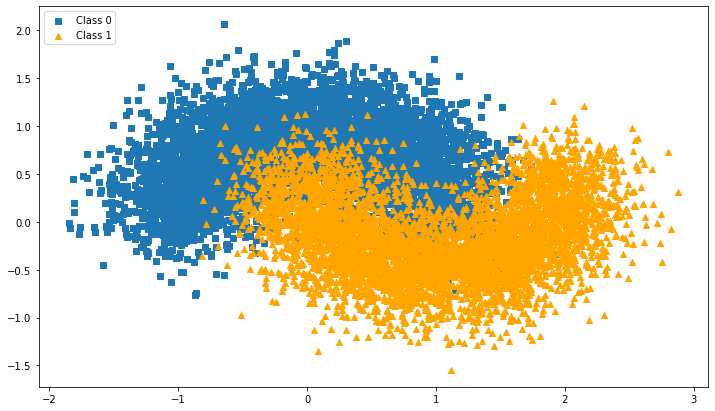

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(class_0[:, 0], class_0[:, 1], marker='s', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='orange', marker='^', label='Class 1')
plt.legend(loc='upper left')
plt.show()

### Phân chia dữ liệu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Chuẩn hoá dữ liệu

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

## SVM với chế độ mặc định

#### Linear Kernel

[LibSVM]Train time: 1.1970081329345703s


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


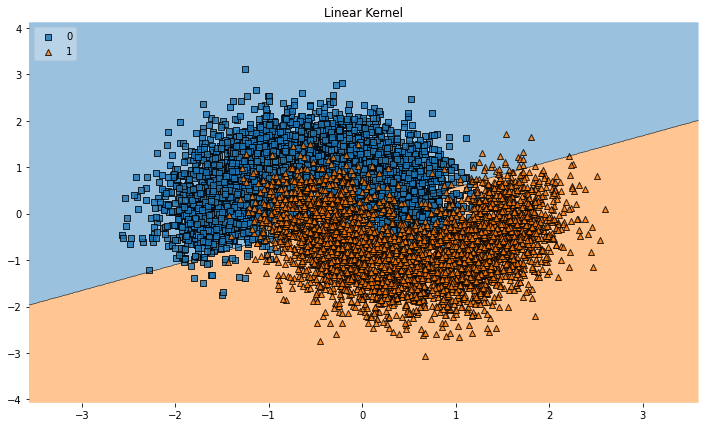

In [ ]:
start = time.time()
linear = SVC(kernel='linear').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')
plt.figure(figsize=(12, 7))
plt.title('Linear Kernel')
plot_decision_regions(X_train, y_train, clf=linear, legend=2)

In [ ]:
y_pred = linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       993
           1       0.86      0.86      0.86      1007

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
train_def, test_def = [], []

In [ ]:
train_acc = linear.score(X_train, y_train)
test_acc = linear.score(X_test, y_test)

train_def.append(train_acc)
test_def.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.852625
Test score: 0.8595


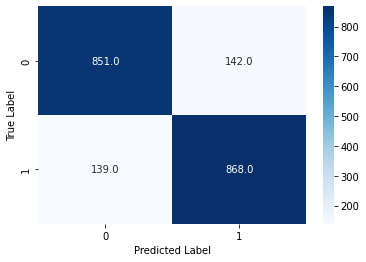

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### RBF Kernel

Train time: 0.8521420955657959s


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


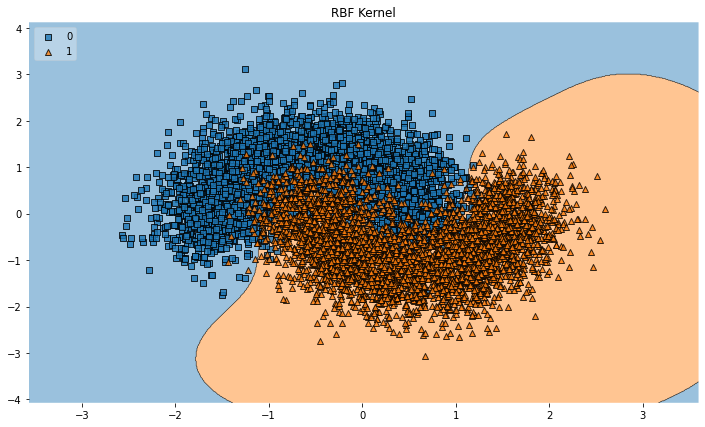

In [ ]:
start = time.time()
rbf = SVC(kernel='rbf').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')
plt.figure(figsize=(12, 7))
plt.title('RBF Kernel')
plot_decision_regions(X_train, y_train, clf=rbf, legend=2)

In [ ]:
y_pred = rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       993
           1       0.93      0.92      0.92      1007

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
train_acc = rbf.score(X_train, y_train)
test_acc = rbf.score(X_test, y_test)

train_def.append(train_acc)
test_def.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.9165
Test score: 0.9235


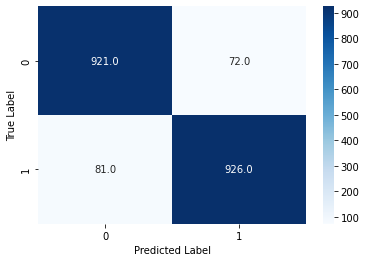

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### Polynomial Kernel

Train time: 0.9343762397766113s


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


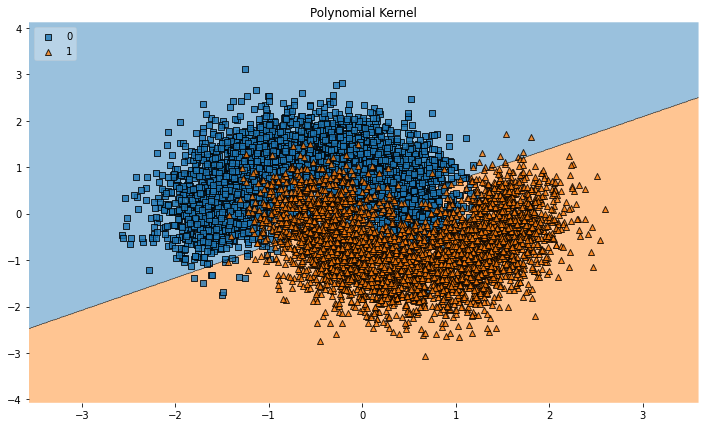

In [ ]:
start = time.time()
poly = SVC(kernel='poly').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')
plt.figure(figsize=(12, 7))
plt.title('Polynomial Kernel')
plot_decision_regions(X_train, y_train, clf=poly, legend=2)

In [ ]:
y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       993
           1       0.84      0.87      0.86      1007

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [ ]:
train_acc = poly.score(X_train, y_train)
test_acc = poly.score(X_test, y_test)

train_def.append(train_acc)
test_def.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.85125
Test score: 0.855


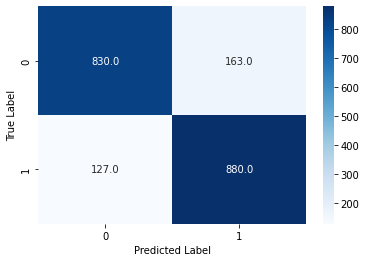

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### Sigmoid Kernel

Train time: 1.971017599105835s


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


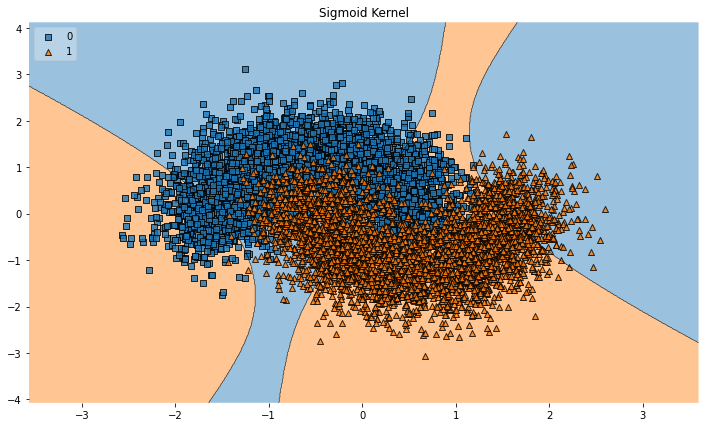

In [ ]:
start = time.time()
sig = SVC(kernel='sigmoid').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')
plt.figure(figsize=(12, 7))
plt.title('Sigmoid Kernel')
plot_decision_regions(X_train, y_train, clf=sig, legend=2)

In [ ]:
y_pred = sig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       993
           1       0.67      0.66      0.66      1007

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



In [ ]:
train_acc = sig.score(X_train, y_train)
test_acc = sig.score(X_test, y_test)

train_def.append(train_acc)
test_def.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.664125
Test score: 0.6635


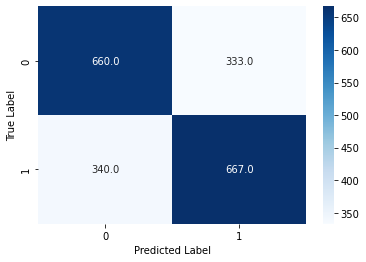

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

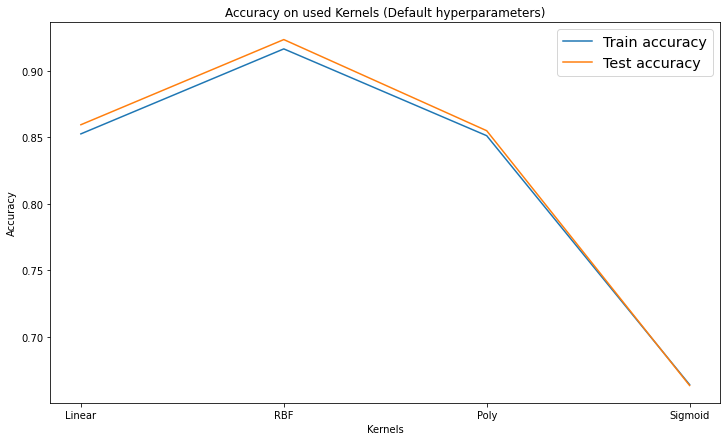

In [ ]:
plt.figure(figsize=(12, 7))
kernels = ['Linear', 'RBF', 'Poly', 'Sigmoid']
plt.plot(kernels, train_def, label = "Train accuracy")
plt.plot(kernels, test_def, label = "Test accuracy")
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("Accuracy on used Kernels (Default hyperparameters)")
plt.legend(fontsize="x-large")
plt.show()

## Hyperparameter Tuning 

### Linear Kernel

#### Tuning

In [ ]:
tuned_parameters = [{'kernel': ['linear'], 
                     'C': [0.001, 0.01, 0.1, 1 , 10]}]

linear_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
linear_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.025, kernel=linear;, score=0.846 total time=   0.6s
[CV 2/5] END ............C=0.025, kernel=linear;, score=0.853 total time=   0.6s
[CV 3/5] END ............C=0.025, kernel=linear;, score=0.862 total time=   0.6s
[CV 4/5] END ............C=0.025, kernel=linear;, score=0.837 total time=   0.6s
[CV 5/5] END ............C=0.025, kernel=linear;, score=0.863 total time=   0.6s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.838 total time=   0.7s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.848 total time=   0.7s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.858 total time=   0.7s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.832 total time=   0.7s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.859 total time=   0.7s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.845 total time=   0.6s
[CV 2/5] END .............C=0.01, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear']}],
             scoring='accuracy', verbose=3)

#### Hyperparameters tốt nhất tìm được

In [ ]:
coef = linear_tunned.best_params_
coef

{'C': 1, 'kernel': 'linear'}

#### Áp dụng Hyperparameters vừa tìm được

In [ ]:
start = time.time()
linear_svm_tunned = SVC(C=1, kernel="linear")
linear_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time()-start}s')

Train time: 1.1513187885284424s


#### Kết quả trên tập test

In [ ]:
y_pred = linear_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       993
           1       0.86      0.86      0.86      1007

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
train_tunned, test_tunned = [], []

In [ ]:
train_acc = linear_svm_tunned.score(X_train, y_train)
test_acc = linear_svm_tunned.score(X_test, y_test)

train_tunned.append(train_acc)
test_tunned.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.852625
Test score: 0.8595


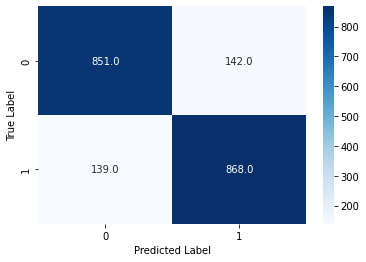

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### So sánh 2 mô hình trước và sau khi tune 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


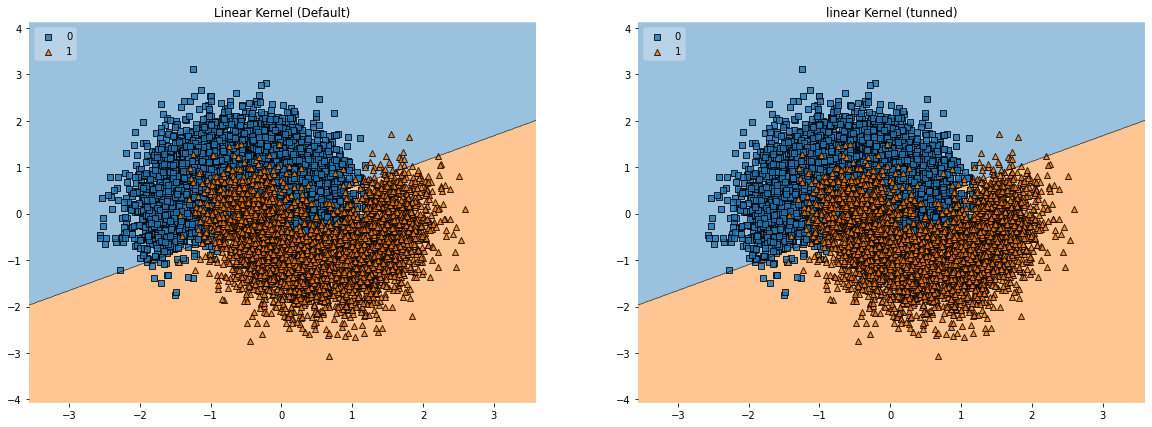

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(1, 2, 1)
plt.title('Linear Kernel (Default)')
plot_decision_regions(X_train, y_train, clf=linear, legend=2)
plt.subplot(1, 2, 2)
plt.title(coef['kernel'] + ' Kernel (tunned)')
plot_decision_regions(X_train, y_train, clf=linear_svm_tunned, legend=2)
plt.show()

### RBF Kernel

#### Tuning

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10],
                     'C': [0.025, 0.001, 0.01, 0.1, 1 , 10]}]

rbf_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
rbf_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.729 total time=   2.7s
[CV 2/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.694 total time=   2.7s
[CV 3/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.706 total time=   2.7s
[CV 4/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.721 total time=   2.7s
[CV 5/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.718 total time=   2.6s
[CV 1/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.838 total time=   1.7s
[CV 2/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.848 total time=   1.7s
[CV 3/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.853 total time=   1.7s
[CV 4/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.831 total time=   1.6s
[CV 5/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.858 total time=   1.7s
[CV 1/5] END ....C=0.025, gamma=0.1, kernel=rbf;, score=0.849 total time=   1.1s
[CV 2/5] END ....C=0.025, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=3)

#### Hypermeters tốt nhất đã tìm được

In [ ]:
coef = rbf_tunned.best_params_
coef

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

#### Áp dụng Hyperparameters vừa tìm được

In [ ]:
start = time.time()
rbf_svm_tunned = SVC(C=1, kernel="rbf", gamma=1)
rbf_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time()-start}s')

Train time: 0.8857614994049072s


#### Kết quả trên tập test

In [ ]:
y_pred = rbf_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       993
           1       0.93      0.92      0.92      1007

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
train_acc = rbf_svm_tunned.score(X_train, y_train)
test_acc = rbf_svm_tunned.score(X_test, y_test)

train_tunned.append(train_acc)
test_tunned.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.9175
Test score: 0.9245


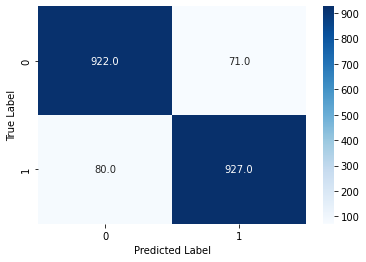

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### So sánh 2 mô hình trước và sau khi tune 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


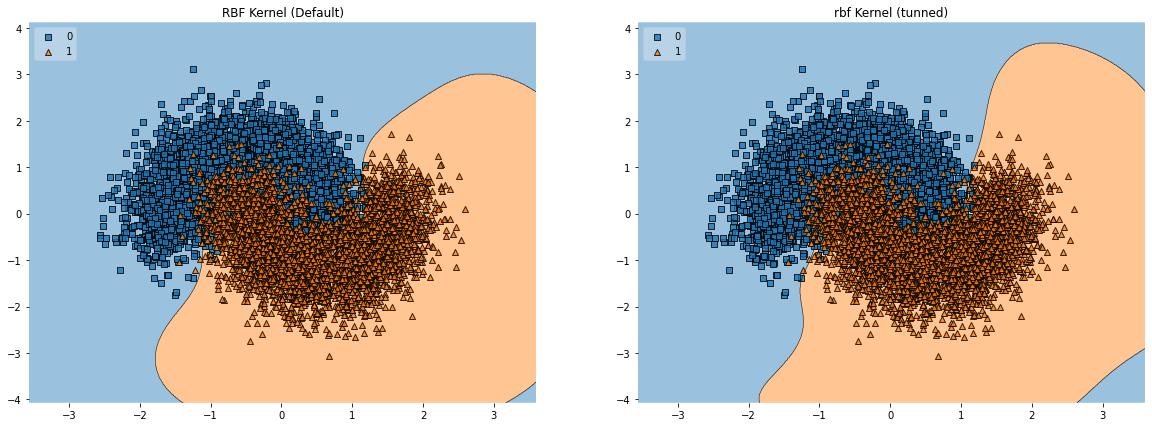

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(1, 2, 1)
plt.title('RBF Kernel (Default)')
plot_decision_regions(X_train, y_train, clf=rbf, legend=2)
plt.subplot(1, 2, 2)
plt.title(coef['kernel'] + ' Kernel (tunned)')
plot_decision_regions(X_train, y_train, clf=rbf_svm_tunned, legend=2)
plt.show()

### Polynomial Kernel

#### Tuning

In [ ]:
tuned_parameters = [{'kernel': ['poly'], 
                     'degree': [1, 2, 3, 4], 
                     'gamma': [0.001, 0.01, 0.1, 1, 5],
                     'C': [0.001, 0.01, 0.1, 1 , 10],
                     'coef0': [-2, -1, -0.5, 0, 0.5, 1, 2]}]

poly_tunned = GridSearchCV(SVC(), tuned_parameters, cv=3, scoring='accuracy', verbose=3)
poly_tunned.fit(X_train, y_train)

Fitting 3 folds for each of 700 candidates, totalling 2100 fits
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.501 total time=   2.4s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.501 total time=   2.4s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.501 total time=   2.4s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.501 total time=   1.2s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.501 total time=   1.3s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.501 total time=   1.2s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.841 total time=   1.2s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.844 total time=   1.2s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.840 total time=   1.2s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10],
                          'coef0': [-2, -1, -0.5, 0, 0.5, 1, 2],
                          'degree': [1, 2, 3, 4],
                          'gamma': [0.001, 0.01, 0.1, 1, 5],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

#### Hypermeters tốt nhất đã tìm được

In [ ]:
coef = poly_tunned.best_params_
coef

{'C': 10, 'coef0': 2, 'degree': 4, 'gamma': 5, 'kernel': 'poly'}

#### Áp dụng Hyperparameters vừa tìm được

In [ ]:
start = time.time()
poly_svm_tunned = SVC(C=10, kernel="poly", degree=4, coef0=2, gamma=5)
poly_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time()-start}s')

Train time: 360.4747965335846s


#### Kết quả trên tập test

In [ ]:
y_pred = poly_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       993
           1       0.92      0.92      0.92      1007

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
train_acc = poly_svm_tunned.score(X_train, y_train)
test_acc = poly_svm_tunned.score(X_test, y_test)

train_tunned.append(train_acc)
test_tunned.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.916375
Test score: 0.9235


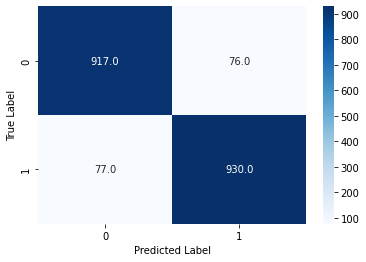

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### So sánh 2 mô hình trước và sau khi tune 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


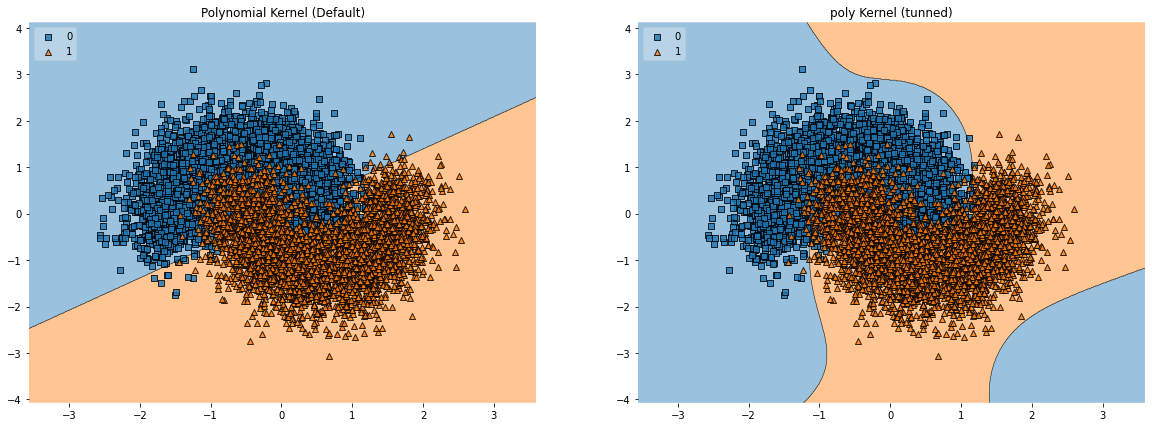

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(1, 2, 1)
plt.title('Polynomial Kernel (Default)')
plot_decision_regions(X_train, y_train, clf=poly, legend=2)
plt.subplot(1, 2, 2)
plt.title(coef['kernel'] + ' Kernel (tunned)')
plot_decision_regions(X_train, y_train, clf=poly_svm_tunned, legend=2)
plt.show()

### Sigmoid Kernel

#### Tuning

In [ ]:
tuned_parameters = [{'kernel': ['sigmoid'], 
                     'gamma': [0.001, 0.01, 0.1, 1, 10],
                     'C': [0.025, 0.001, 0.01, 0.1, 1 , 10],
                     'coef0': np.arange(-2,2.5,0.5)}]

sig_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
sig_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 2/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 3/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 4/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 5/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 1/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 2/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 3/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 4/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.501 total time=   3.6s
[CV 5/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.501 total time

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'coef0': array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['sigmoid']}],
             scoring='accuracy', verbose=3)

#### Hypermeters tốt nhất đã tìm được

In [ ]:
coef = sig_tunned.best_params_
coef

{'C': 10, 'coef0': -1.0, 'gamma': 0.1, 'kernel': 'sigmoid'}

#### Áp dụng Hyperparameters vừa tìm được

In [ ]:
start = time.time()
sig_svm_tunned = SVC(C=10, kernel="sigmoid", gamma=0.1, coef0=-1)
sig_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time()-start}s')

Train time: 2.7062911987304688s


#### Kết quả trên tập test

In [ ]:
y_pred = sig_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       993
           1       0.90      0.90      0.90      1007

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
train_acc = sig_svm_tunned.score(X_train, y_train)
test_acc = sig_svm_tunned.score(X_test, y_test)

train_tunned.append(train_acc)
test_tunned.append(test_acc)

print(f'Train score: {train_acc}')
print(f'Test score: {test_acc}')

Train score: 0.886875
Test score: 0.8985


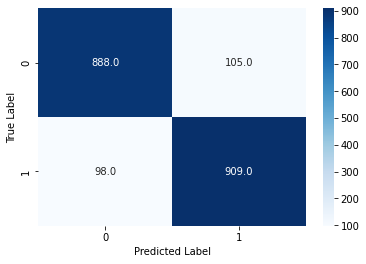

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

#### So sánh 2 mô hình trước và sau khi tune 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


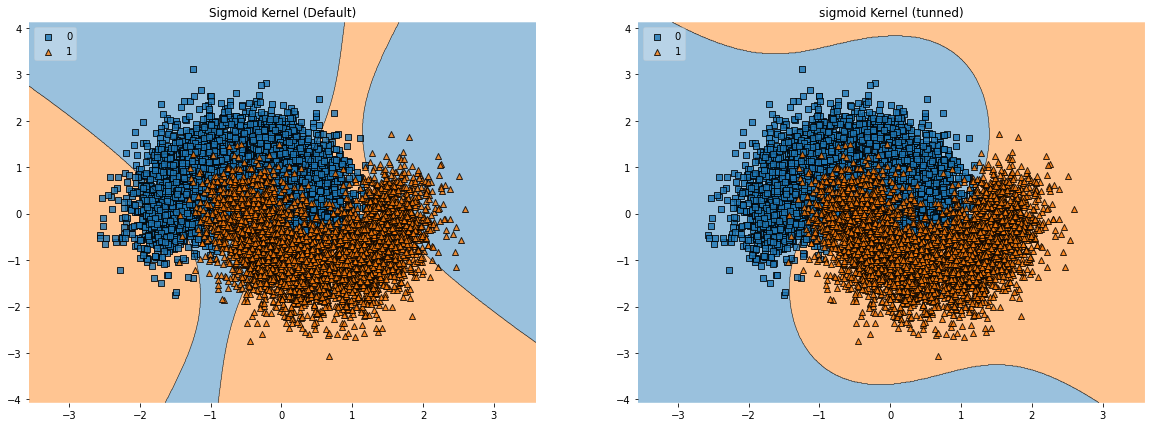

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(1, 2, 1)
plt.title('Sigmoid Kernel (Default)')
plot_decision_regions(X_train, y_train, clf=sig, legend=2)
plt.subplot(1, 2, 2)
plt.title(coef['kernel'] + ' Kernel (tunned)')
plot_decision_regions(X_train, y_train, clf=sig_svm_tunned, legend=2)
plt.show()

# Tập dữ liệu Surgical-deepnet.csv

## Đọc và xử lý dữ liệu

In [ ]:
!gdown --id 13pT4UpwDkxLfpkT6Ier0mo77-T5tT6ch

Downloading...
From: https://drive.google.com/uc?id=13pT4UpwDkxLfpkT6Ier0mo77-T5tT6ch
To: /content/Surgical-deepnet.csv
100% 1.23M/1.23M [00:00<00:00, 78.7MB/s]


#### Bảng dữ liệu

In [ ]:
df = pd.read_csv('Surgical-deepnet.csv')
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,0,1,18,0.466129,0.012903,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,0,1,19,0.183370,0.007424,-0.50,0,1,8.30,5,0,0,0.17,1,1


#### Hiển thị các dữ liệu bị trùng

In [ ]:
dup = df[df.duplicated()]
dup

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
5401,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
5402,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
5403,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
5404,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
5405,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8298,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
8299,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
8300,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0
8301,28.98,90.0,1,0,0,1,0,0,0,1,0,0,0,0.081977,0.002959,-1.97,0,1,9.12,8,0,0,-2.25,1,0


In [ ]:
print(f'Total rows duplicated: {len(dup)}')

Total rows duplicated: 2902


#### Lọc các dữ liệu bị trùng

In [ ]:
df = df.drop_duplicates()
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,0,1,18,0.466129,0.012903,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,0,1,19,0.183370,0.007424,-0.50,0,1,8.30,5,0,0,0.17,1,1


#### Thông tin sơ lược về dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11733 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  11733 non-null  float64
 1   Age                  11733 non-null  float64
 2   asa_status           11733 non-null  int64  
 3   baseline_cancer      11733 non-null  int64  
 4   baseline_charlson    11733 non-null  int64  
 5   baseline_cvd         11733 non-null  int64  
 6   baseline_dementia    11733 non-null  int64  
 7   baseline_diabetes    11733 non-null  int64  
 8   baseline_digestive   11733 non-null  int64  
 9   baseline_osteoart    11733 non-null  int64  
 10  baseline_psych       11733 non-null  int64  
 11  baseline_pulmonary   11733 non-null  int64  
 12  ahrq_ccs             11733 non-null  int64  
 13  ccsComplicationRate  11733 non-null  float64
 14  ccsMort30Rate        11733 non-null  float64
 15  complication_rsi     11733 non-null 

In [ ]:
X = df.drop('complication', axis = 1)
y = df.complication

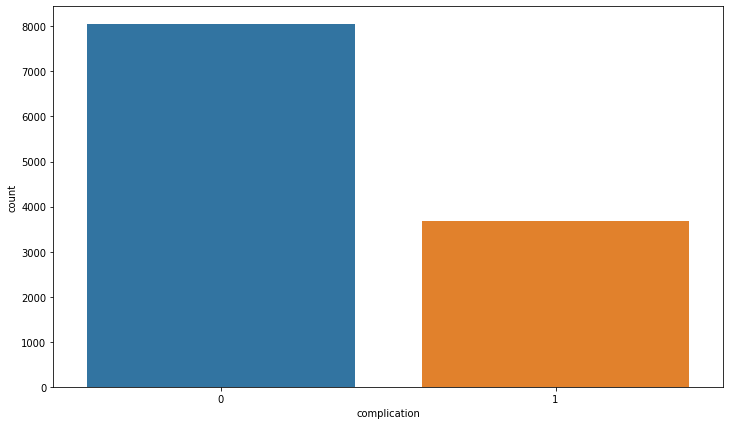

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='complication', data = df)

In [ ]:
df['complication'].value_counts()

0    8043
1    3690
Name: complication, dtype: int64

### Oversampling

In [ ]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

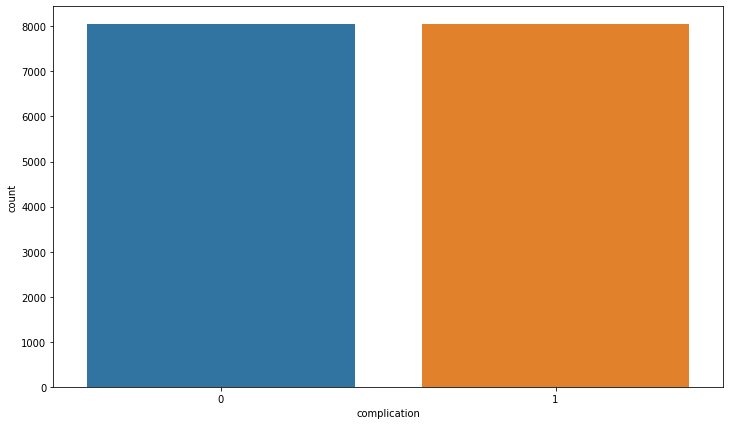

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x = y, data = df)

In [ ]:
X = X.values
y = y.values

### Phân chia dữ liệu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Chuẩn hoá dữ liệu

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

## Kernel SVM với tham số mặc định

### Linear Kernel

In [ ]:
start = time.time()
linear = SVC(kernel='linear').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 13.175792455673218s


In [ ]:
y_pred = linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1572
           1       0.76      0.70      0.73      1646

    accuracy                           0.73      3218
   macro avg       0.73      0.73      0.73      3218
weighted avg       0.73      0.73      0.73      3218



In [ ]:
print(f'Train score: {linear.score(X_train, y_train)}')
print(f'Test score: {linear.score(X_test, y_test)}')

Train score: 0.7319707802300279
Test score: 0.7324425108763207


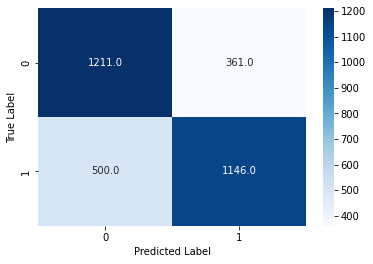

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### RBF Kernel

In [ ]:
start = time.time()
rbf = SVC(kernel='rbf').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 13.331632852554321s


In [ ]:
y_pred = rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1572
           1       0.77      0.74      0.75      1646

    accuracy                           0.75      3218
   macro avg       0.75      0.75      0.75      3218
weighted avg       0.75      0.75      0.75      3218



In [ ]:
print(f'Train score: {rbf.score(X_train, y_train)}')
print(f'Test score: {rbf.score(X_test, y_test)}')

Train score: 0.7939850792663973
Test score: 0.752330640149161


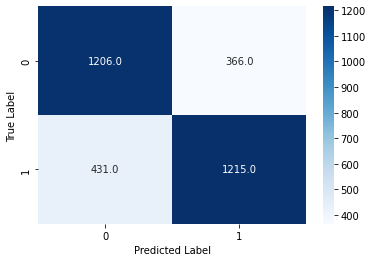

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### Polynomial Kernel

In [ ]:
start = time.time()
poly = SVC(kernel='poly').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 8.248843669891357s


In [ ]:
y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1572
           1       0.74      0.76      0.75      1646

    accuracy                           0.74      3218
   macro avg       0.74      0.74      0.74      3218
weighted avg       0.74      0.74      0.74      3218



In [ ]:
print(f'Train score: {poly.score(X_train, y_train)}')
print(f'Test score: {poly.score(X_test, y_test)}')

Train score: 0.7907211687907989
Test score: 0.7411435674331883


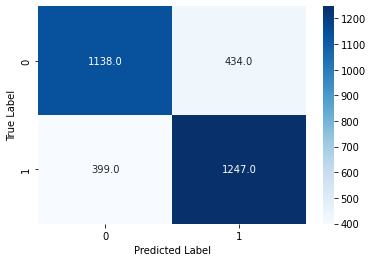

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### Sigmoid Kernel

In [ ]:
start = time.time()
sig = SVC(kernel='sigmoid').fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 10.134907722473145s


In [ ]:
y_pred = sig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      1572
           1       0.68      0.66      0.67      1646

    accuracy                           0.67      3218
   macro avg       0.67      0.67      0.67      3218
weighted avg       0.67      0.67      0.67      3218



In [ ]:
print(f'Train score: {sig.score(X_train, y_train)}')
print(f'Test score: {sig.score(X_test, y_test)}')

Train score: 0.6502953061858875
Test score: 0.6668738346799254


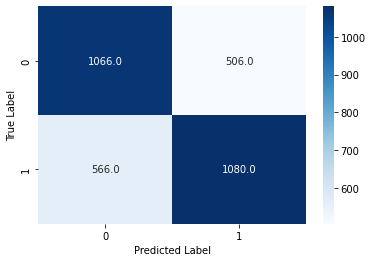

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

## Hyperparameter Tuning 

### Linear Kernel

In [ ]:
tuned_parameters = [{'kernel': ['linear'], 
                     'C': [0.025, 0.001, 0.01, 0.1, 1 , 10]}]

linear_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
linear_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.025, kernel=linear;, score=0.743 total time=   4.4s
[CV 2/5] END ............C=0.025, kernel=linear;, score=0.740 total time=   4.4s
[CV 3/5] END ............C=0.025, kernel=linear;, score=0.733 total time=   4.4s
[CV 4/5] END ............C=0.025, kernel=linear;, score=0.721 total time=   4.3s
[CV 5/5] END ............C=0.025, kernel=linear;, score=0.739 total time=   4.4s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.737 total time=   4.5s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.735 total time=   4.7s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.730 total time=   4.4s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.717 total time=   4.6s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.738 total time=   4.6s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.743 total time=   4.2s
[CV 2/5] END .............C=0.01, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear']}],
             scoring='accuracy', verbose=3)

In [ ]:
coef = linear_tunned.best_params_
coef

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
linear_svm_tunned = SVC(C=0.1, kernel="linear")
linear_svm_tunned.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred = linear_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1572
           1       0.76      0.69      0.72      1646

    accuracy                           0.73      3218
   macro avg       0.73      0.73      0.73      3218
weighted avg       0.73      0.73      0.73      3218



In [ ]:
print(f'Train score: {linear_svm_tunned.score(X_train, y_train)}')
print(f'Test score: {linear_svm_tunned.score(X_test, y_test)}')

Train score: 0.7367889337892446
Test score: 0.7308887507768801


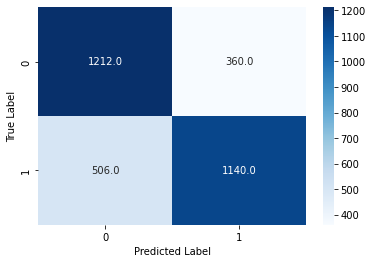

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### RBF Kernel

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10],
                     'C': [0.025, 0.001, 0.01, 0.1, 1 , 10]}]

rbf_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
rbf_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.706 total time=  21.5s
[CV 2/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.707 total time=  10.4s
[CV 3/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.711 total time=  10.5s
[CV 4/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.691 total time=  10.4s
[CV 5/5] END ..C=0.025, gamma=0.001, kernel=rbf;, score=0.703 total time=  10.4s
[CV 1/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.730 total time=   8.7s
[CV 2/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.728 total time=   8.8s
[CV 3/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.716 total time=   8.8s
[CV 4/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.707 total time=   8.7s
[CV 5/5] END ...C=0.025, gamma=0.01, kernel=rbf;, score=0.728 total time=  10.8s
[CV 1/5] END ....C=0.025, gamma=0.1, kernel=rbf;, score=0.707 total time=   9.9s
[CV 2/5] END ....C=0.025, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=3)

In [ ]:
coef = rbf_tunned.best_params_
coef

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
start = time.time()
rbf_svm_tunned = SVC(C=1, kernel="rbf", gamma=0.1)
rbf_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 10.56132960319519s


In [ ]:
y_pred = rbf_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1572
           1       0.78      0.73      0.76      1646

    accuracy                           0.76      3218
   macro avg       0.76      0.76      0.76      3218
weighted avg       0.76      0.76      0.76      3218



In [ ]:
print(f'Train score: {rbf_svm_tunned.score(X_train, y_train)}')
print(f'Test score: {rbf_svm_tunned.score(X_test, y_test)}')

Train score: 0.857320484923842
Test score: 0.7576134244872592


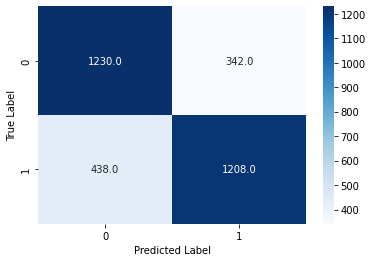

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### Polynomial Kernel

In [ ]:
tuned_parameters = [{'kernel': ['poly'],
                     'gamma': [0.001, 0.01, 0.1, 1, 5], 
                     'degree': [1, 2, 3, 4], 
                     'C': [0.001, 0.01, 0.1, 1, 10],
                     'coef0': [-2, -0.5, 0, 0.5, 2]}]

poly_tunned = GridSearchCV(SVC(), tuned_parameters, cv=3, scoring='accuracy', verbose=3)
poly_tunned.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.503 total time=  11.9s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.503 total time=   6.8s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.001, kernel=poly;, score=0.503 total time=   5.3s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.503 total time=   5.3s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.503 total time=   5.3s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.01, kernel=poly;, score=0.503 total time=   5.3s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.711 total time=   4.7s
[CV 2/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.706 total time=   4.7s
[CV 3/3] END C=0.001, coef0=-2, degree=1, gamma=0.1, kernel=poly;, score=0.702 total time=   4.7s
[CV 1/3] END C=0.001, coef0=-2, degree=1, gam

In [ ]:
coef = poly_tunned.best_params_
coef

{'C': 0.1, 'coef0': 2, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [ ]:
start = time.time()
poly_svm_tunned = SVC(C=0.1, kernel="poly", degree=3, coef0=2, gamma=0.1)
poly_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 16.162450790405273s


In [ ]:
print(f'Train score: {poly_svm_tunned.score(X_train, y_train)}')
print(f'Test score: {poly_svm_tunned.score(X_test, y_test)}')

Train score: 0.8078178427106
Test score: 0.7507768800497203


In [ ]:
y_pred = poly_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1572
           1       0.76      0.74      0.75      1646

    accuracy                           0.75      3218
   macro avg       0.75      0.75      0.75      3218
weighted avg       0.75      0.75      0.75      3218



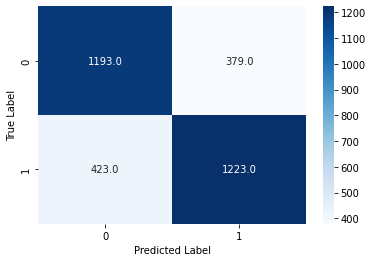

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)

### Sigmoid Kernel

In [ ]:
tuned_parameters = [{'kernel': ['sigmoid'], 
                     'gamma': [0.001, 0.01, 0.1, 1, 10],
                     'C': [0.025, 0.001, 0.01, 0.1, 1 , 10],
                     'coef0': np.arange(-2,2.5,0.5)}]

sig_tunned = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', verbose=3)
sig_tunned.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.503 total time=  12.9s
[CV 2/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.503 total time=  13.0s
[CV 3/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.503 total time=  12.9s
[CV 4/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.503 total time=  12.9s
[CV 5/5] END C=0.025, coef0=-2.0, gamma=0.001, kernel=sigmoid;, score=0.503 total time=  12.8s
[CV 1/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.526 total time=  12.9s
[CV 2/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.519 total time=  13.0s
[CV 3/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.527 total time=  14.7s
[CV 4/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.524 total time=  22.4s
[CV 5/5] END C=0.025, coef0=-2.0, gamma=0.01, kernel=sigmoid;, score=0.523 total time

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.025, 0.001, 0.01, 0.1, 1, 10],
                          'coef0': array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['sigmoid']}],
             scoring='accuracy', verbose=3)

In [ ]:
coef = sig_tunned.best_params_
coef

{'C': 0.1, 'coef0': -2.0, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [ ]:
start = time.time()
sig_svm_tunned = SVC(C=0.1, kernel="sigmoid", gamma=0.1, coef0=-2)
sig_svm_tunned.fit(X_train, y_train)
print(f'Train time: {time.time() - start}s')

Train time: 12.792940139770508s


In [ ]:
y_pred = sig_svm_tunned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1572
           1       0.75      0.74      0.75      1646

    accuracy                           0.74      3218
   macro avg       0.74      0.74      0.74      3218
weighted avg       0.74      0.74      0.74      3218



In [ ]:
print(f'Train score: {sig_svm_tunned.score(X_train, y_train)}')
print(f'Test score: {sig_svm_tunned.score(X_test, y_test)}')

Train score: 0.7517096673919801
Test score: 0.7423865755127408


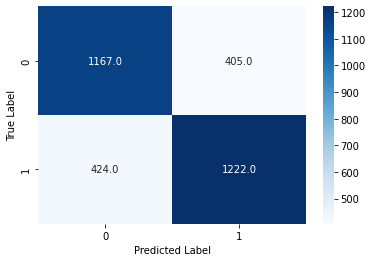

<Figure size 576x360 with 0 Axes>

In [ ]:
showCM(y_test,y_pred)